## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('df_final.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'])

In [5]:
df['dia'] = df['Data'].dt.day
df['dia_da_semana'] = pd.to_datetime(df['Data']).dt.day_name().astype(str)

### Metrics distribution for each feature

- Visualização da variação estatística em cada feature

In [6]:
df.drop(columns=['Hora', 'ano', 'mes']).describe()

,hourly_demand,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",populacao_dia,industria_geral,industria_extrativa,industria_transformacao,taxa_desocupacao,dia
count,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,3.794300e+04,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000
mean,63986.662763,968.737479,969.019431,968.428845,806.428584,24.032003,18.079458,24.710762,23.402302,18.643535,17.557607,76.010279,70.330755,73.215679,160.728990,4.680350,1.872775,43.337090,2.090527e+08,86.481807,94.892599,85.393640,12.850942,15.714124
std,8968.332772,8.528625,8.480939,8.513175,915.452518,3.138572,2.486965,3.353881,3.019927,2.422658,2.591131,13.494790,15.309003,14.517404,20.184088,1.510778,0.645950,53.181692,1.732754e+06,4.583069,6.762284,5.066479,1.021291,8.792758
min,0.000000,926.050000,926.275000,925.950000,0.000000,13.365789,8.597964,13.966667,12.447046,9.093151,7.813575,34.680233,30.023256,32.344920,55.857143,0.750000,0.100000,0.000000,2.060858e+08,64.900000,79.600000,61.000000,11.100000,1.000000
25%,56973.956500,963.004258,963.334030,962.723572,88.208947,21.830000,16.580861,22.246211,21.359933,17.105959,16.038358,65.485800,57.121269,61.158583,146.497871,3.435917,1.360447,6.000000,2.077318e+08,86.300000,89.100000,85.000000,12.000000,8.000000
50%,64480.267000,966.519457,966.839767,966.244043,243.933333,23.582035,18.761124,24.272000,23.130556,19.337805,18.188651,79.750000,73.125000,76.440000,160.000000,4.516210,1.822222,22.800000,2.087710e+08,87.400000,94.000000,86.300000,12.600000,16.000000
75%,70846.152000,973.737879,973.943982,973.381385,1596.851064,26.512149,19.971153,27.456383,25.693394,20.516686,19.504571,87.818182,84.315789,86.316431,173.953756,5.896203,2.351197,60.400000,2.105482e+08,88.600000,101.900000,87.800000,13.400000,23.000000
max,90120.004000,1002.900000,1002.816667,1002.266667,3299.940659,34.145029,23.547059,34.912281,33.352924,23.811765,23.182353,97.333333,97.000000,97.000000,302.285714,11.010000,4.687500,486.200000,2.122692e+08,91.300000,104.000000,91.200000,14.900000,31.000000


### Visualização de distribuições

In [7]:
features = ['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
            'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'VENTO, RAJADA MAXIMA (m/s)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'populacao_dia',
            'industria_geral', 'industria_extrativa', 'industria_transformacao', 'taxa_desocupacao', 'hourly_demand']

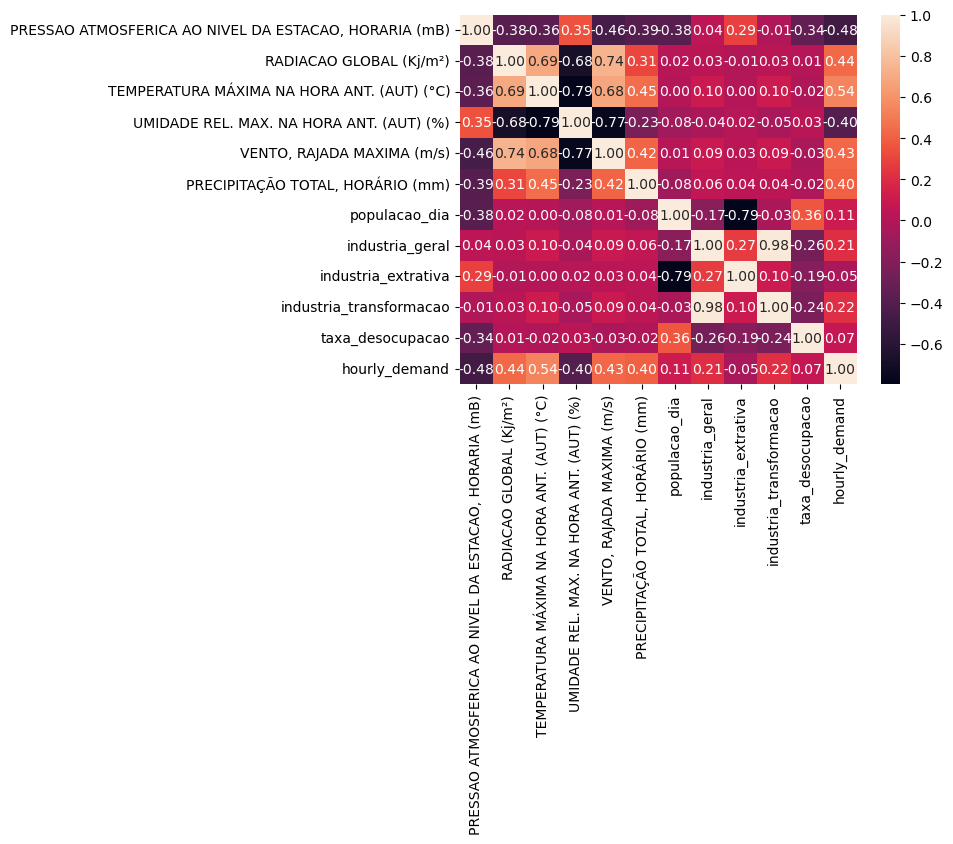

In [8]:
ax = sns.heatmap(df[features].corr(), annot=True, fmt='.2f')

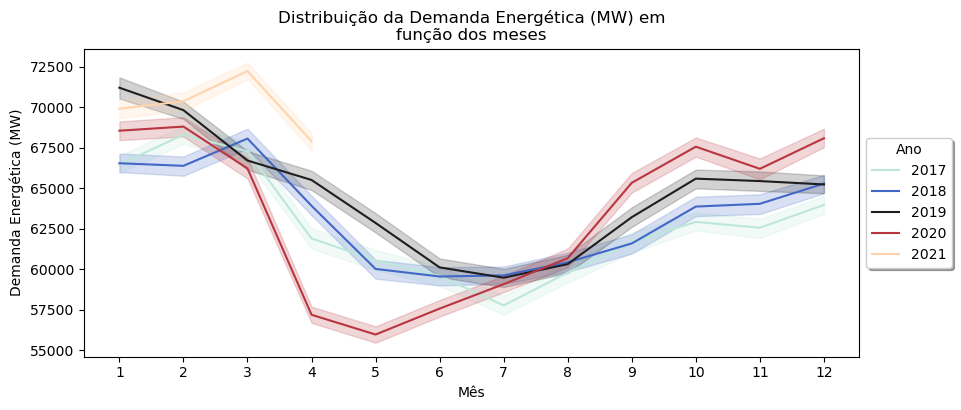

In [9]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='mes', y='hourly_demand', hue='ano', palette = 'icefire')
ax.set(xlabel='Mês', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção dos meses')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(1,13));

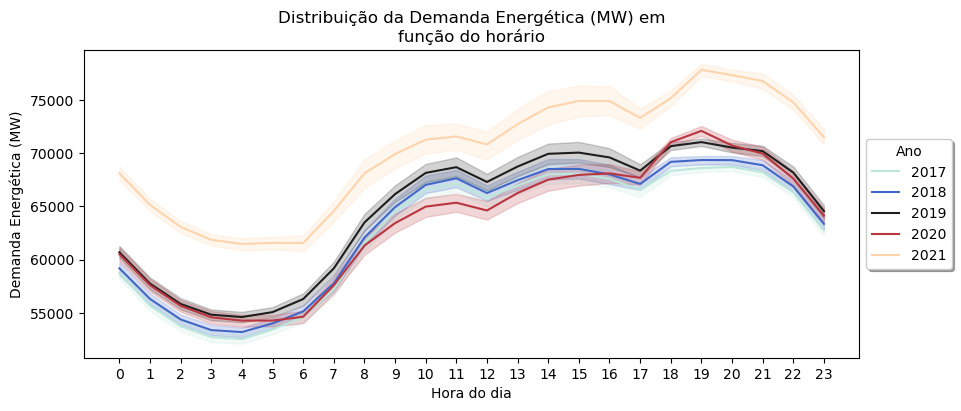

In [10]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='Hora', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Hora do dia', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do horário')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(0,24));

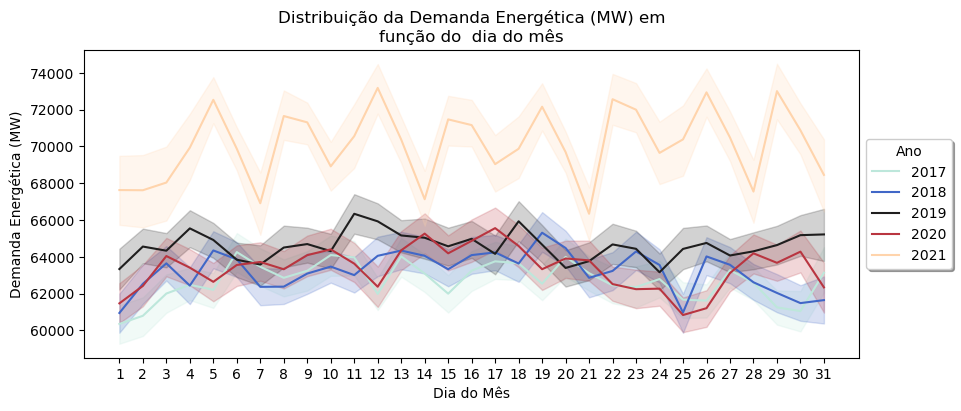

In [11]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='dia', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Dia do Mês', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do  dia do mês')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(1,32));

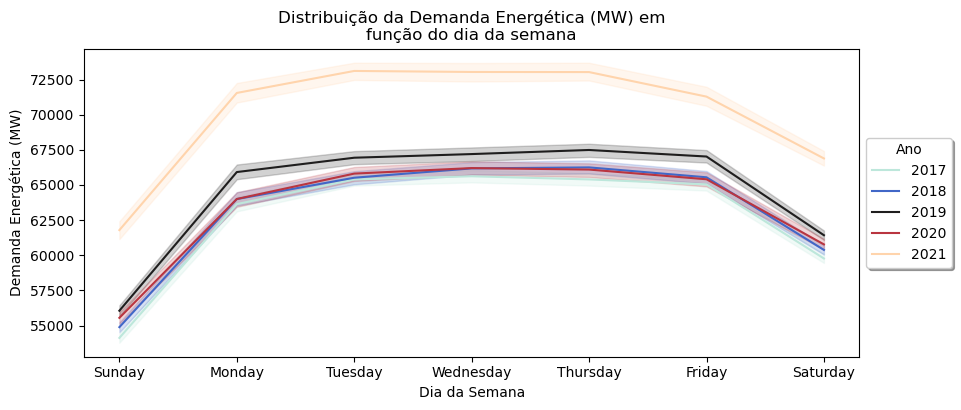

In [12]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='dia_da_semana', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Dia da Semana', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do dia da semana')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(0,7));

In [13]:
df.head()

,hourly_demand,Data,Hora,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",populacao_dia,ano,mes,industria_geral,industria_extrativa,industria_transformacao,taxa_desocupacao,dia,dia_da_semana
0,54737.946,2017-01-01,0,974.566667,974.758333,973.666667,2.000000,23.675000,21.066667,24.433333,23.425000,21.616667,20.666667,86.833333,83.000000,86.083333,226.250000,5.808333,1.816667,22.0,2.060858e+08,2017,1,86.4,102.2,83.7,13.9,1,Sunday
1,54221.548,2017-01-01,1,975.609091,975.663636,974.900000,1.545455,23.472727,21.136364,24.300000,23.409091,21.436364,20.818182,87.727273,82.272727,87.181818,168.181818,6.490909,2.063636,24.8,2.060858e+08,2017,1,86.4,102.2,83.7,13.9,1,Sunday
2,53781.230,2017-01-01,2,960.715385,960.930769,960.276923,5.000000,22.561538,20.523077,23.269231,22.430769,20.961538,20.346154,89.307692,85.846154,88.615385,203.000000,6.161538,2.646154,11.2,2.060858e+08,2017,1,86.4,102.2,83.7,13.9,1,Sunday
3,52837.082,2017-01-01,3,980.014286,980.342857,979.914286,93.571429,24.100000,21.685714,24.371429,23.885714,22.028571,21.457143,89.000000,84.571429,86.714286,243.571429,4.214286,1.757143,0.0,2.060858e+08,2017,1,86.4,102.2,83.7,13.9,1,Sunday
4,52037.905,2017-01-01,4,983.512500,983.837500,983.225000,18.375000,23.662500,21.587500,24.075000,23.550000,21.950000,21.525000,89.625000,87.375000,88.625000,185.125000,3.787500,1.475000,2.6,2.060858e+08,2017,1,86.4,102.2,83.7,13.9,1,Sunday


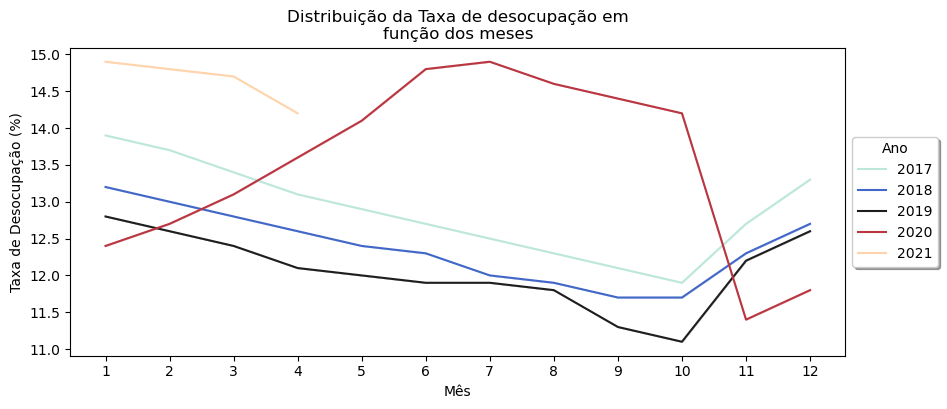

In [14]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='mes', y='taxa_desocupacao', hue='ano', palette = 'icefire')

ax.set(xlabel='Mês', ylabel='Taxa de Desocupação (%)', title='Distribuição da Taxa de desocupação em\nfunção dos meses')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(1,13));

## Modeling

In [15]:
# Corrigir coluna de dia da semana para numerico 
df['dia_da_semana'] = df['Data'].dt.dayofweek

# Remover coluna de Data
df.drop(columns='Data', inplace=True)

In [16]:
df.dropna(inplace=True)

- Separação de treino e teste

In [17]:
X_train = df.query('ano < 2021').drop(columns='hourly_demand').reset_index(drop=True)

In [18]:
y_train = df.query('ano < 2021')['hourly_demand'].reset_index(drop=True)

In [19]:
X_test = df.query('ano >= 2021').drop(columns='hourly_demand').reset_index(drop=True)

In [20]:
y_test = df.query('ano >= 2021')['hourly_demand'].reset_index(drop=True)

- Padronização de dados

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']))

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.drop(columns=['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']).columns)

In [25]:
# Dados de treino padronizados
X_train_scaled = pd.concat([X_train[['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']], X_train_scaled], axis=1)

In [26]:
X_test_scaled = scaler.fit_transform(X_test.drop(columns=['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']))

In [27]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.drop(columns=['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']).columns)

In [28]:
# Dados de teste padronizados
X_test_scaled = pd.concat([X_test[['Hora', 'ano', 'mes', 'dia', 'dia_da_semana']], X_test_scaled], axis=1)

In [29]:
from sklearn.model_selection import cross_validate

### Regressão Linear

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
cv_rl = pd.DataFrame(cross_validate(model, X_train_scaled, y_train, cv=5, scoring='r2'))

In [34]:
cv_rl.head()

,fit_time,score_time,test_score
0,0.024982,0.002002,0.629008
1,0.016018,0.002002,0.614155
2,0.013931,0.002000,0.606548
3,0.015503,0.002000,0.685348
4,0.015018,0.002003,0.516040


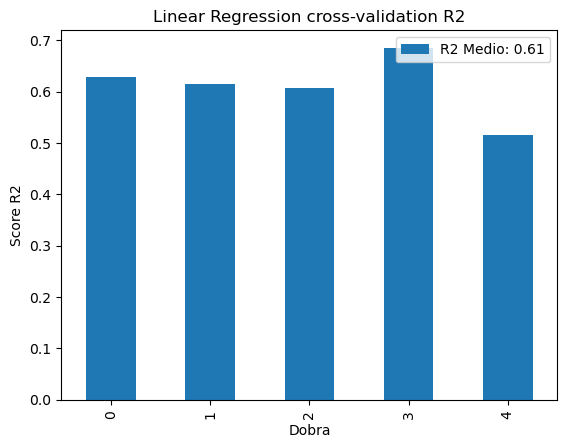

In [70]:
ax = cv_rl['test_score'].plot(kind='bar', label=f'R2 Medio: {cv_rl["test_score"].mean().round(3)}')
ax.set(title='Linear Regression cross-validation R2', xlabel='Dobra', ylabel='Score R2')
plt.legend(loc='upper right');

In [36]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
linear_regressor = pd.Series(model.predict(X_test_scaled))

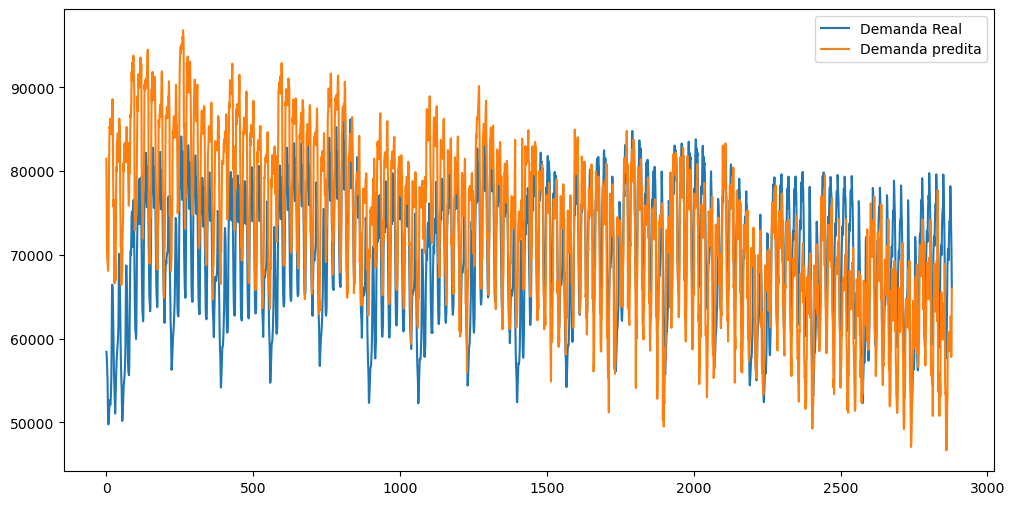

In [38]:
plt.figure(figsize=(12,6))
y_test.plot(kind='line', label='Demanda Real')
linear_regressor.plot(kind='line', label='Demanda predita')
plt.legend()
plt.show()

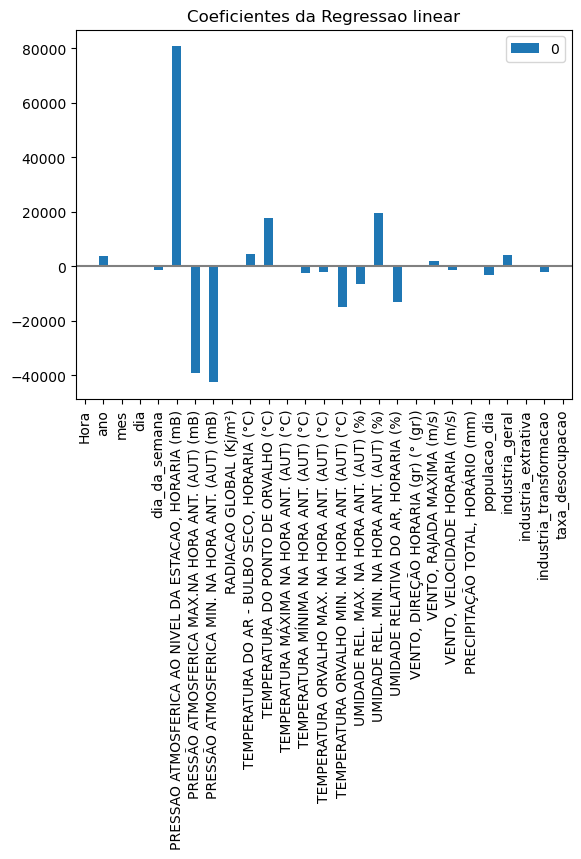

In [39]:
ax = pd.DataFrame(model.coef_, index=X_test_scaled.columns).plot(kind='bar', label='Coeficientes do Modelo')
ax.set(title='Coeficientes da Regressao linear')
plt.axhline(y=0, color=".5");

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(random_state=42)

In [60]:
cv_rf = pd.DataFrame(cross_validate(rf, X_train_scaled, y_train, cv=5, scoring='r2'))

In [61]:
cv_rf.head()

,fit_time,score_time,test_score
0,50.225877,0.077098,0.710297
1,49.825358,0.085504,0.846073
2,49.716548,0.088397,0.824203
3,49.404598,0.084094,0.888740
4,49.273627,0.061427,0.611994


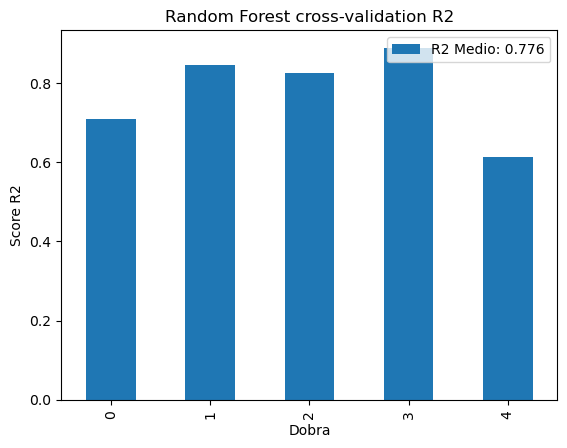

In [71]:
ax = cv_rf['test_score'].plot(kind='bar', label=f'R2 Medio: {cv_rf["test_score"].mean().round(3)}')
ax.set(title='Random Forest cross-validation R2', xlabel='Dobra', ylabel='Score R2')
plt.legend(loc='upper right');

In [63]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [64]:
rf_regressor = pd.Series(rf.predict(X_test_scaled))

C:\Users\kauan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


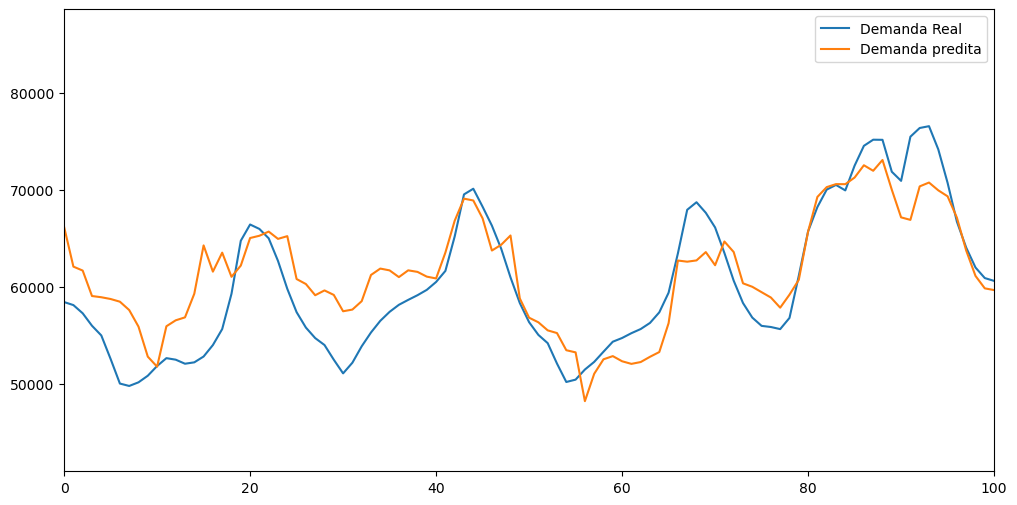

In [65]:
plt.figure(figsize=(12,6))
y_test.plot(kind='line', label='Demanda Real')
rf_regressor.plot(kind='line', label='Demanda predita')
plt.legend()
plt.xlim([0, 100])
plt.show()

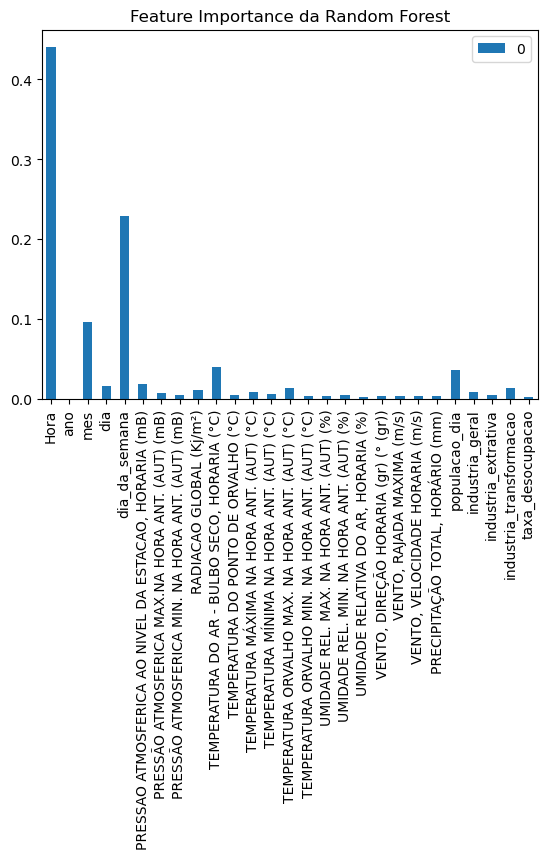

In [66]:
ax = pd.DataFrame(rf.feature_importances_, index=X_test_scaled.columns).plot(kind='bar', label='Coeficientes do Modelo')
ax.set(title='Feature Importance da Random Forest');

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt = DecisionTreeRegressor(random_state=42)

In [42]:
cv_dt = pd.DataFrame(cross_validate(dt, X_train_scaled, y_train, cv=5, scoring='r2'))

In [43]:
cv_dt.head()

,fit_time,score_time,test_score
0,0.646012,0.002001,0.020352
1,0.643882,0.003001,0.698411
2,0.636247,0.003610,0.632593
3,0.661749,0.004018,0.775561
4,0.664110,0.003000,0.263469


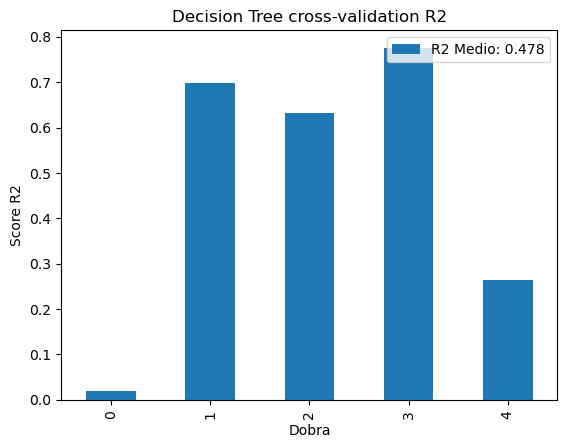

In [72]:
ax = cv_dt['test_score'].plot(kind='bar', label=f'R2 Medio: {cv_dt["test_score"].mean().round(3)}')
ax.set(title='Decision Tree cross-validation R2', xlabel='Dobra', ylabel='Score R2')
plt.legend(loc='upper right');

In [45]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
dt_regressor = pd.Series(dt.predict(X_test_scaled))

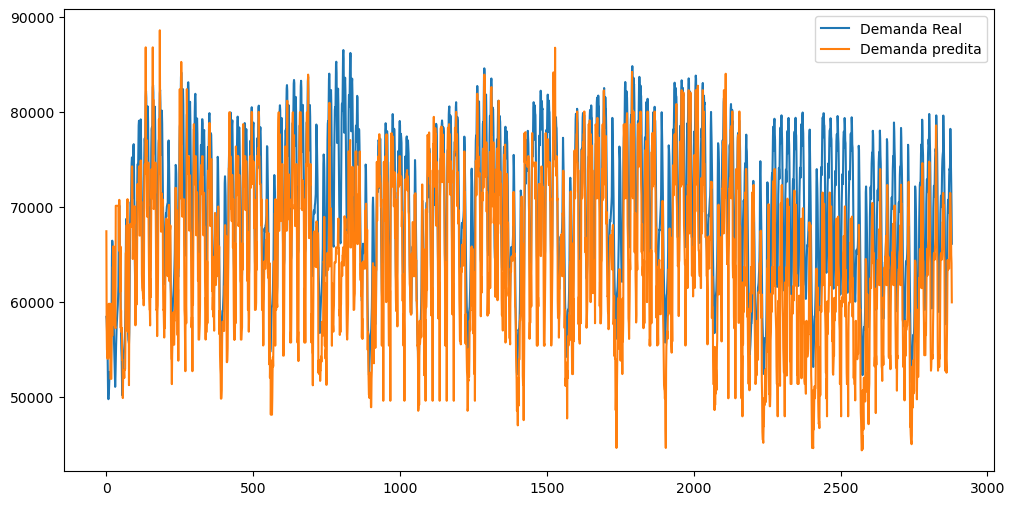

In [47]:
plt.figure(figsize=(12,6))
y_test.plot(kind='line', label='Demanda Real')
dt_regressor.plot(kind='line', label='Demanda predita')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Feature Importance da Decision Tree')

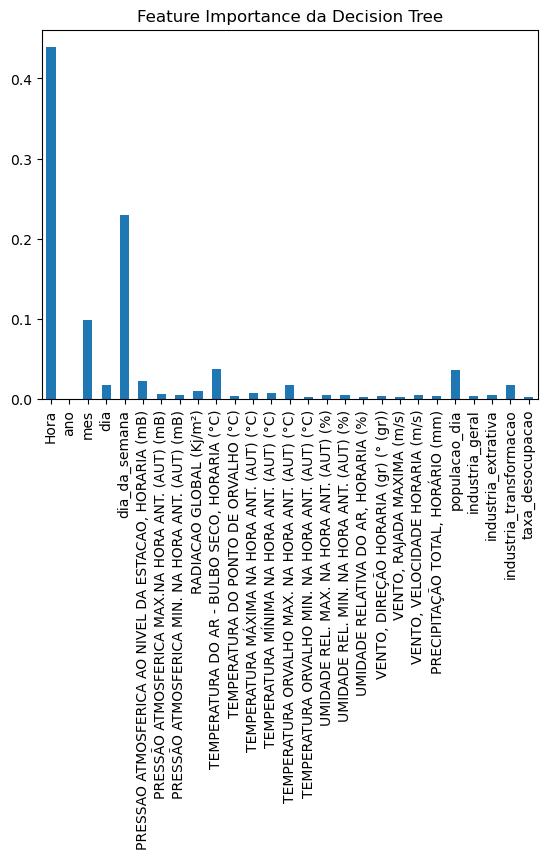

In [119]:
importances = dt.feature_importances_
forest_importances = pd.Series(importances, index=X_test_scaled.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importance da Decision Tree")

### LightGBM

In [48]:
import lightgbm as lgb

In [49]:
lgbm = lgb.LGBMRegressor(random_state=42)

In [50]:
X_train_scaled.columns = range(X_train_scaled.columns.size)

In [51]:
cv_lgbm = pd.DataFrame(cross_validate(lgbm, X_train_scaled, y_train, cv=5, scoring='r2'))

In [52]:
cv_lgbm.head()

,fit_time,score_time,test_score
0,0.170366,0.005503,0.875591
1,0.168760,0.005001,0.884004
2,0.169377,0.006011,0.847689
3,0.163840,0.008003,0.918100
4,0.154651,0.005503,0.725801


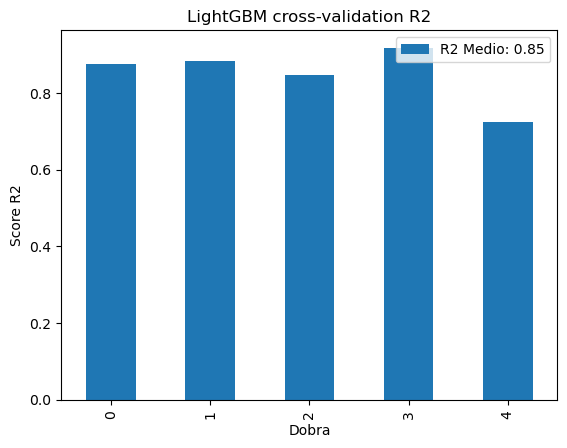

In [105]:
ax = cv_lgbm['test_score'].plot(kind='bar', label=f'R2 Medio: {cv_lgbm["test_score"].mean().round(3)}')
ax.set(title='LightGBM cross-validation R2', xlabel='Dobra', ylabel='Score R2')
plt.legend(loc='upper right');

In [54]:
lgbm.fit(X_train_scaled, y_train)

LGBMRegressor(random_state=42)

In [55]:
lgbm_regressor = pd.Series(lgbm.predict(X_test_scaled))

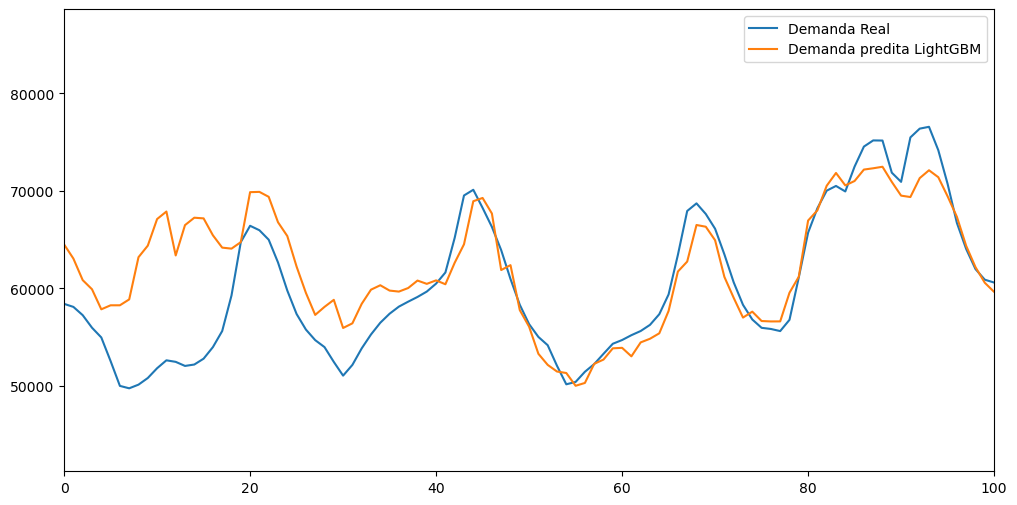

In [67]:
plt.figure(figsize=(12,6))
y_test.plot(kind='line', label='Demanda Real')
lgbm_regressor.plot(kind='line', label='Demanda predita LightGBM')

plt.legend()
plt.xlim([0, 100])
plt.show()

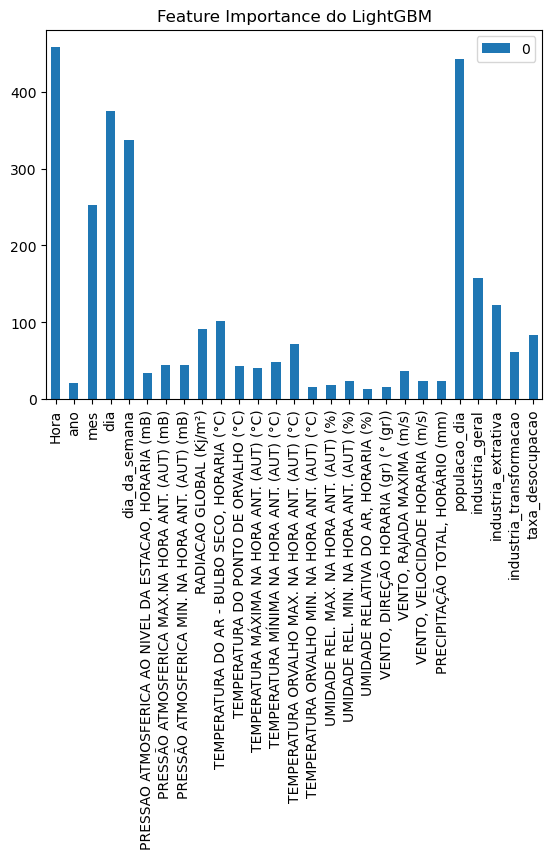

In [57]:
ax = pd.DataFrame(lgbm.feature_importances_, index=X_test_scaled.columns).plot(kind='bar', label='Coeficientes do Modelo')
ax.set(title='Feature Importance do LightGBM');

### Visualizar previsões dos modelos com melhores performances

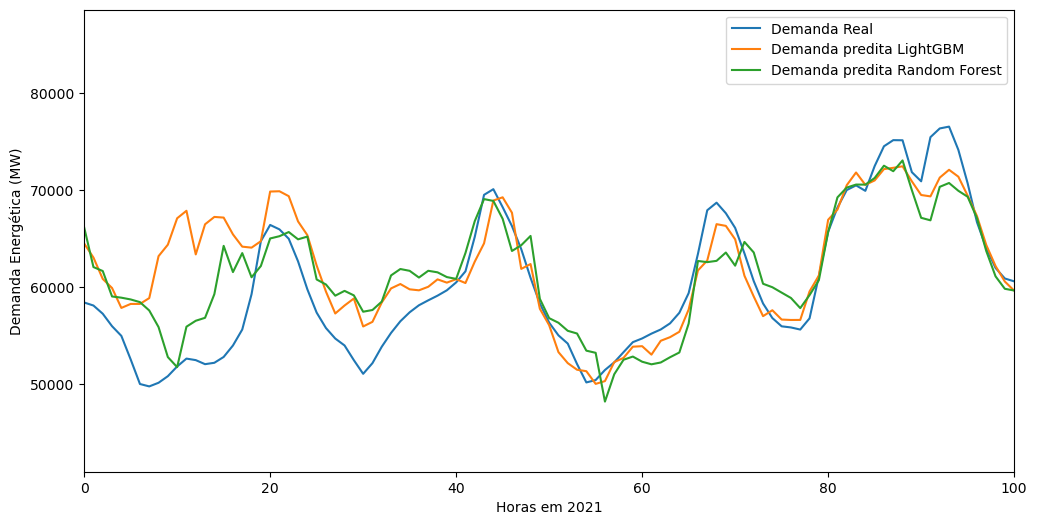

In [120]:
plt.figure(figsize=(12,6))
y_test.plot(kind='line', label='Demanda Real')
lgbm_regressor.plot(kind='line', label='Demanda predita LightGBM')
rf_regressor.plot(kind='line', label='Demanda predita Random Forest')

plt.legend()
plt.xlim([0, 100])
plt.ylabel('Demanda Energética (MW)')
plt.xlabel('Horas em 2021')
plt.show()